In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Assuming you have a CSV file named 'data.csv' with 'target' column as the label
data = pd.read_csv("digit-recognizer/train.csv")

# Separate features (X) and target (y)
X = data.drop(['label'], axis=1)
y = data['label']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

In [10]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [13]:
K = [1, 3, 5, 7, 9, 11, 13, 15]
# Create a k-NN classifier with k=3 (you can choose the value of k based on your problem)
output=[]
for i in K:
    acc={}
    knn = KNeighborsClassifier(n_neighbors=i)
    acc["k"]=i
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    y_pred_t = knn.predict(X_train)
    
    train_accuracy = accuracy_score(y_train, y_pred_t)
    acc["Train Accuracy"]=train_accuracy
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    # Calculate the accuracy of the model
    test_accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy: {accuracy:.2f}")
    acc["Test Accuracy"]=test_accuracy
    output.append(acc)

pd.DataFrame(output)

,k,Train Accuracy,Test Accuracy
0,1,1.000000,0.966803
1,3,0.981429,0.965102
2,5,0.976593,0.964150
3,7,0.973150,0.961224
4,9,0.970733,0.960000
5,11,0.967033,0.958571
6,13,0.964579,0.956599
7,15,0.962344,0.955238


In [15]:
output_df=pd.DataFrame(output)

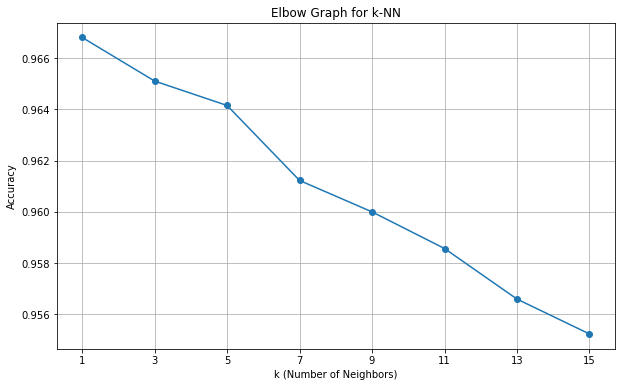

In [17]:
# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(output_df["k"], output_df["Test Accuracy"], marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Elbow Graph for k-NN')
plt.xticks(output_df["k"])
plt.grid(True)
plt.show()

As visible from above graph, The optimum k is 5